First we will explore our data set that was exposed by the sklearn package

In [37]:
print("Versions of the runtime and packages used for this assignment:")
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import mglearn
print("mglearn version: {}".format(mglearn.__version__))

print("-------------------------------------------------------")
print("When run on my machine the following versions were used:")
print("Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]")
print("pandas version: 1.5.3")
print("matplotlib version: 3.7.1")
print("NumPy version: 1.24.3")
print("scikit-learn version: 1.3.0")
print("mglearn version: 0.1.9")

Versions of the runtime and packages used for this assignment:
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.24.3
scikit-learn version: 1.3.1
mglearn version: 0.1.9
-------------------------------------------------------
When run on my machine the following versions were used:
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.24.3
scikit-learn version: 1.3.0
mglearn version: 0.1.9


## Load the Dataset

In [60]:
from sklearn.utils import Bunch

def load_breast_cancer(relative_filepath):
    '''
    Parse data from file at specified path and extract features, labels, and instances.
    The file contains comma separated values (csv) that can be parsed into a matrix with the following structure:
    - The first row contains the names of the features followed by the label name.
    - The remaining rows contain the expression values for each feature in each instance.
      - The last column contains an encoded value for whether the cell is cancerous or not.
    Args:
        arg1 (str): relative file path to the file to be parsed
    Returns:
        Bunch: data structure to store the dataset and its relevant metadata
    '''
    number_of_columns = 6;
    first_feature_column_index = 0
    last_feature_column_index = number_of_columns - 1
    first_expression_data_row_index = 1
    header_row_index = 0

    # Parse the data from file
    raw_data = np.genfromtxt(relative_filepath, delimiter=',', dtype=str)
    # extract the instances each with 1926 features, excluding the label vector and first row of feature names
    data = raw_data[
        first_expression_data_row_index:,
        first_feature_column_index:last_feature_column_index
    ].astype(float)
    # extract the feature names from the first row
    # excluding the last two columns that are the column headers from target and target_actual
    feature_names = raw_data[
        header_row_index:first_expression_data_row_index,
        first_feature_column_index:last_feature_column_index
    ].ravel()
    # extract the label values from the second to last column
    target = raw_data[
        first_expression_data_row_index:,
        last_feature_column_index:number_of_columns
    ].astype(float).ravel()
    # Create an array of friendly names for the labels
    # whose indexes correspond to the label values
    target_names = []
    normal_breast_tissue_encoded = 0
    target_names.insert(normal_breast_tissue_encoded, 'normal breast tissue')
    primary_breast_cancer_encoded = 1
    target_names.insert(primary_breast_cancer_encoded, 'primary breast cancer')

    # summarize the data set
    description = f'''\
    Breast Cancer dataset
    --------------------

    **Data Set Characteristics:**

        :Number of Instances: 569
        :Number of Features: 5 (6 including label)
        :Feature Information:
            - mean_radius
            - mean_texture
            - mean_perimeter
            - mean_area
            - mean_smoothness
            - class (diagnosis):
                - normal breast tissue (0)
                - primary breast cancer (1)
    '''

    # Create a dictionary to store the dataset and its relevant metadata
    bunch_data = {
        'data': data,
        'target': target,
        'target_names': target_names,
        'feature_names': feature_names,
        'DESCR': description,
        'filename': relative_filepath.split('/')[-1]
    }
    # Create a Bunch object to store the dataset and its relevant metadata
    return Bunch(**bunch_data)

# file containing comma separated values.
# The first 1926 values are the feature names, the next is 'target', followed by 'target_actual' which all act as column labels
# The following sets of 1928 values are the instances of the dataset.
# The last two values of each set are the label name and the label value respectively
relative_filepath = './data/GSE58606_data.csv'
# load dataset from file
dataset = load_breast_cancer(relative_filepath)

## Explore the data

In [61]:
# Explore the dataset
print("Description {}".format(dataset.DESCR))
print("Filename {}".format(dataset.filename))
print("Label Names {}".format(dataset.target_names))
print("Label Vector {}".format(dataset.target))
print("Feature Names {}".format(dataset.feature_names))
# anonymous function to format the data to 2 decimal places
withFormatter = lambda x: "{:.2f}".format(x);
# create a function that will apply the anonymous function to each element in the matrix
float_formatter = np.vectorize(withFormatter)
print("Formatted Data {}".format(float_formatter(dataset.data)))
print("Unformatted Data {}".format(dataset.data))
print("Data Shape {}".format(dataset.data.shape))

Description     Breast Cancer dataset
    --------------------

    **Data Set Characteristics:**

        :Number of Instances: 569
        :Number of Features: 5 (6 including label)
        :Feature Information:
            - mean_radius
            - mean_texture
            - mean_perimeter
            - mean_area
            - mean_smoothness
            - class (diagnosis):
                - normal breast tissue (0)
                - primary breast cancer (1)
    
Filename GSE58606_data.csv
Label Names ['normal breast tissue', 'primary breast cancer']
Label Vector [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 

In [62]:
pd.DataFrame(dataset.data)

,0,1,2,3,4
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


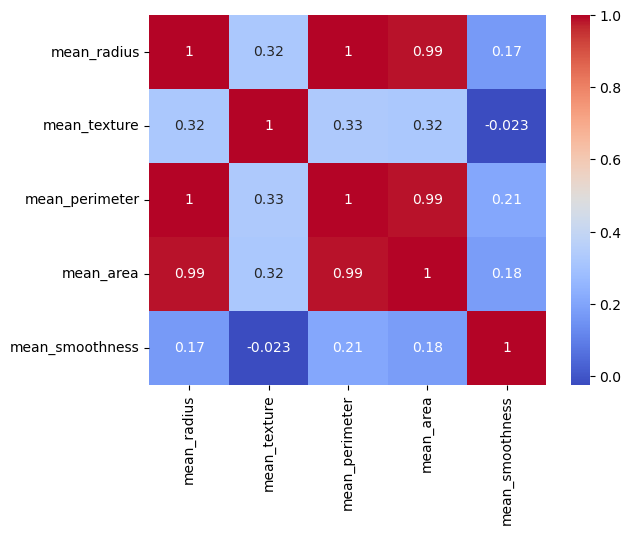

In [63]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

import seaborn as sns
# Visually include the correlation coefficient in each cell of the correlation matrix
include_correlation_coefficient_in_each_cell = True
# coolwarm is a color map that indicates the strength of the relationship
# between each feature using a color gradient from blue to red.
color_map = 'coolwarm'
# Correlation matrix
correlation_matrix = df.corr()
# Create a heatmap to visualize the correlation matrix
sns.heatmap(
    correlation_matrix,
    annot=include_correlation_coefficient_in_each_cell,
    cmap=color_map
);

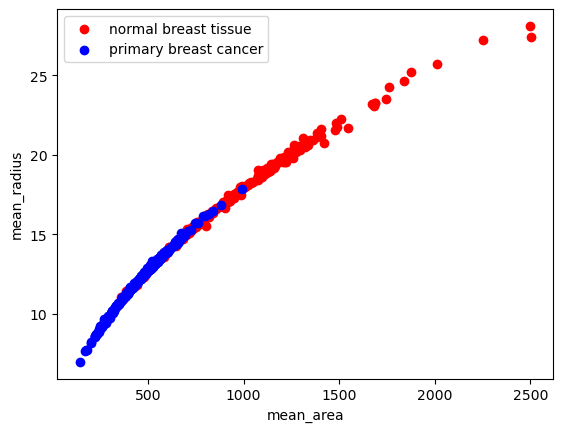

In [64]:
import matplotlib.pyplot as plt
# set of ticks in the color bar
ticks = [i for i, class_name in enumerate(dataset.target_names)]
# plot the instances colored by the class label
color_map = {0: 'red', 1: 'blue', 2: 'green'}
colors = [color_map[c] for c in dataset.target]
for i, class_name in enumerate(dataset.target_names):
    plt.scatter(
        df.loc[dataset.target == i, "mean_area"],
        df.loc[dataset.target == i, "mean_radius"],
        c=color_map[i],
        label=class_name
    )
# add a color bar to indicate which color corresponds to which class
plt.legend()
# label the axes
plt.xlabel("mean_area")
plt.ylabel("mean_radius")
plt.show()

## Perform supervised learning algorithm

In [65]:
from sklearn.neighbors import KNeighborsClassifier
# construct an instance of a K-Nearest Neighbor classifier with the most effective value of k
supervised_classifier = KNeighborsClassifier(n_neighbors=3)
# train the classifier on the training set
supervised_classifier.fit(dataset.data, dataset.target)
# produce a vector of labels arrived at by the classifier using the testing data
y_pred = supervised_classifier.predict(dataset.data)

## Prepare Data for Semi-Supervised Learning
Our entire dataset is labeled.  
We want to simulate a subset of the instances are unlabeled

However, we also have an unbalanced dataset where there are more instances of normal tissue cells than instances of tissue cells with breast cancer. When we unlabel a subset of the instances we want to preserve the portion of unbalance in the dataset.


In [66]:
random_number_generator = np.random.RandomState(0)
# labeled and unlabeled vector
y_label_vector_with_missing_labels = np.copy(dataset.target)
classes, counts = np.unique(dataset.target, return_counts=True)
number_to_unblabel_by_class = (counts * 0.1).astype(int)
for klass, number_to_unlabel in zip(classes, number_to_unblabel_by_class):
    # get the indices of the instances with the current class label
    indices = np.where(y_label_vector_with_missing_labels == klass)[0]
    # choose random indices to remove label from
    remove_indices = random_number_generator.choice(indices, size=number_to_unlabel, replace=False)
    # set these indices to be unlabeled
    y_label_vector_with_missing_labels[remove_indices] = -1


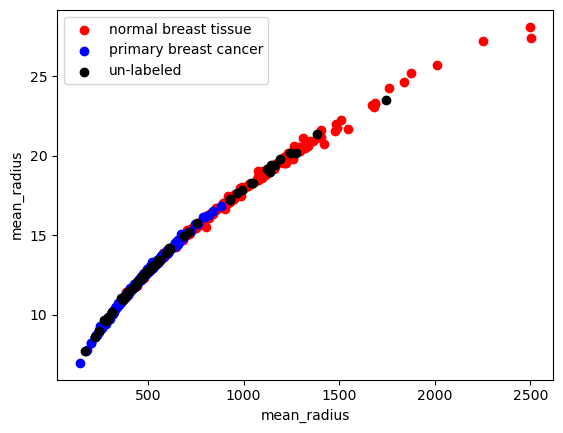

In [67]:
color_map = {-1: 'black', 0: 'red', 1: 'blue', 2: 'green'}
colors = [color_map[c] for c in y_label_vector_with_missing_labels]
all_classes = np.append(dataset.target_names, 'un-labeled')
for i, class_name in enumerate(all_classes):
    encoded_label_value = i if i < 2 else -1
    plt.scatter(
        df.loc[y_label_vector_with_missing_labels == encoded_label_value, "mean_area"],
        df.loc[y_label_vector_with_missing_labels == encoded_label_value, "mean_radius"],
        c=color_map[encoded_label_value],
        label=class_name
    )
# add a color bar to indicate which color corresponds to which class
plt.legend()
# label the axes
plt.xlabel("mean_radius")
plt.ylabel("mean_radius")
plt.show()

In [68]:
# create helper function to compare the performance of various semi-supervised techniques
from sklearn.metrics import precision_score, recall_score, f1_score

# Create a dictionary to store the performance metrics of each model
performance_metrics = {}

def record_performance(optimization_technique_name, y_true, y_pred, description):
    """
    Add the performance metrics of the model to the dictionary
    keyed by the optimization technique name so we can compare the results of each model.

    Parameters:
        optimization_technique_name (str): short name of the optimization technique
        regression_results_wrapper (statsmodels.regression.linear_model.RegressionResultsWrapper): the performance results of a linear model.
        description (str): description of the optimization technique
    """
    performance_metrics[optimization_technique_name] = {
        'precision': precision_score(y_true, y_pred, average='macro'),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'f1-score': f1_score(y_true, y_pred, average='macro'),
        'description': description
    }

record_performance('supervised', dataset.target, y_pred, 'supervised learning')

## Perform Semi-Supervised Learning Techniques

In [89]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler instance
scaler = StandardScaler()

# fit the scaler to the data and transform the data
X_scaled = pd.DataFrame(np.round(scaler.fit_transform(df), 3), columns=df.columns)

In [90]:
X = X_scaled[['mean_area', 'mean_radius']]

X

,mean_area,mean_radius
0,0.984,1.097
1,1.909,1.830
2,1.559,1.580
3,-0.764,-0.769
4,1.826,1.750
...,...,...
564,2.344,2.111
565,1.724,1.705
566,0.578,0.702
567,1.735,1.838


In [91]:
# Label Spreading
from sklearn.semi_supervised import LabelSpreading, SelfTrainingClassifier
# Controls the amount of influence labeled points have on label propagation
clamping_factor = 0.5
# larger value of gamma the kernel is more sensitive to the distance between points
width_of_kernel = 100
label_spreading = LabelSpreading(
    kernel="rbf",
    gamma=width_of_kernel,
    alpha=clamping_factor,
    max_iter=100
)
label_spreading.fit(X, y_label_vector_with_missing_labels)
y_pred = label_spreading.predict(X)
record_performance('label_spreading', dataset.target, y_pred, 'label spreading')

## Compare Performance of Techniques

In [92]:
# Pretty print the dataframe using the dictionary keys as the row names and the dictionary values as the column values
orient_frame_with_key_value_pairs_as_rows = 'index'

# Remove the column width constraint so the entire description is displayed instead of being truncated with ellipsis
pd.set_option('display.max_colwidth', None)
# create a dataframe from the dictionary of performance metrics using the dictionary keys as the row names
pd.DataFrame.from_dict(performance_metrics, orient=orient_frame_with_key_value_pairs_as_rows)

,precision,recall,f1-score,description
supervised,0.926438,0.918629,0.922248,supervised learning
label_spreading,0.906690,0.865711,0.879968,label spreading


c:\Users\walkersmith\AppData\Local\Anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LabelSpreading was fitted with feature names
  warnings.warn(
c:\Users\walkersmith\AppData\Local\Anaconda3\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


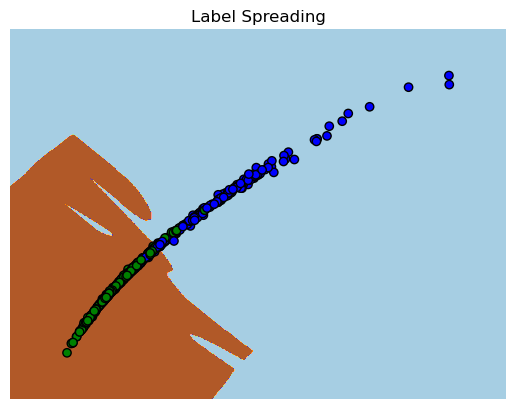

In [93]:
h = 0.02
x_min, x_max = X['mean_area'].min() - 1, X['mean_area'].max() + 1
y_min, y_max = X['mean_radius'].min() - 1, X['mean_radius'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

color_map = {
    -1: 'red',
    0: 'blue',
    1: 'green',
    2: 'purple'
}
Z = label_spreading.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("off")

# Plot also the training points
colors = [color_map[y] for y in dataset.target]
plt.scatter(X['mean_area'], X['mean_radius'], c=colors, edgecolors="black")

plt.title("Label Spreading")
plt.show()